In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

In [2]:
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [3]:
#Define input array with alpha from 0 to 1
# allow floats w/ decimals
alpha_i = np.array([i/10 for i in range(0,10,1)])


In [4]:
alpha_i

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [5]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Add features

In [6]:
df['balance_student'] = df['balance'] * df['student']
df['balance_default'] = df['balance'] * df['default']
df['student_default'] = df['student'] * df['default']
df['balance_sqrt'] = (df['balance'] + 100) ** .5
df['balance2'] = (df['balance'] + 100) ** 2
df['balance3'] = (df['balance'] + 100) ** 3

# Training and Test Data

In [7]:
# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)  # Can be done in other ways, splitting in half like this is crappy
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

In [8]:
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])] # Everything but income

# This is Linear Regression


In [24]:
# make an empty array called train
lin_train = []
lin_test = []

for num in alpha_i:
        # print(num)
        regrBig = linear_model.LinearRegression()
        regrBig.fit(X_train2, Y_train)
        # create a df
        lin_train.append(regrBig.score(X_train2, Y_train))
        lin_test.append(regrBig.score(X_test, Y_test))
        
df_linreg_score = pd.DataFrame()
df_linreg_score['alpha_val']   = alpha_i
df_linreg_score['train_score'] = lin_train
df_linreg_score['test_score']  = lin_test


In [25]:
df_linreg_score

,alpha_val,train_score,test_score
0,0.0,0.573973,0.563024
1,0.1,0.573973,0.563024
2,0.2,0.573973,0.563024
3,0.3,0.573973,0.563024
4,0.4,0.573973,0.563024
5,0.5,0.573973,0.563024
6,0.6,0.573973,0.563024
7,0.7,0.573973,0.563024
8,0.8,0.573973,0.563024
9,0.9,0.573973,0.563024


In [14]:
df_linreg_score

,alpha_val,train_score,test_score
0,0.0,0.573973,0.563024
1,0.1,0.573973,0.563024
2,0.2,0.573973,0.563024
3,0.3,0.573973,0.563024
4,0.4,0.573973,0.563024
5,0.5,0.573973,0.563024
6,0.6,0.573973,0.563024
7,0.7,0.573973,0.563024
8,0.8,0.573973,0.563024
9,0.9,0.573973,0.563024


 # Ridge Reg with Alpha changes... need training and testing data

In [ ]:
# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced. Note that by convention, the
# intercept is not regularized. Since we standardized the data
# earlier, the intercept should be equal to zero and can be dropped.

ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train2, Y_train)
print(ridgeregr.score(X_train2, Y_train))
origparams = ridgeregr.coef_[0]
print(origparams)

In [17]:
ridgeregrBig = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)
print(ridgeregrBig.score(X_train2, Y_train))
newparams = ridgeregrBig.coef_[0, 0:len(origparams)]

print('\nParameter Estimates for the same predictors for the small model'
      'and large model:')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})
print(prettycompare)

0.5739464289613304
[-2.18345205e-03 -7.57156891e-01  4.77049991e-02 -3.66908529e-03
  9.52109450e-03 -3.78154074e-03 -4.47224220e-03  4.83414402e-04
 -4.79227769e-06]
0.5739464289613304

Parameter Estimates for the same predictors for the small modeland large model:
[[-0.002 -0.002]
 [-0.757 -0.757]
 [0.048 0.048]
 [-0.004 -0.004]
 [0.010 0.010]
 [-0.004 -0.004]
 [-0.004 -0.004]
 [0.000 0.000]
 [-0.000 -0.000]]


In [30]:
ridge_train = []
ridge_test = []

for num in alpha_i:
        # print(num)
        ridgeregrBig = linear_model.Ridge(alpha=num, fit_intercept=False)
        ridgeregrBig.fit(X_train2, Y_train)
        print(ridgeregrBig.score(X_train2, Y_train))
        # create a df
        ridge_train.append(ridgeregrBig.score(X_train2, Y_train))
        ridge_test.append(ridgeregrBig.score(X_test, Y_test))

df_ridge_reg_score = pd.DataFrame()
df_ridge_reg_score['alpha_val']   = alpha_i
df_ridge_reg_score['train_score'] = ridge_train
df_ridge_reg_score['test_score']  = ridge_test


0.5739733101710923
0.5739722663409004
0.5739720657072824
0.5739717725978037
0.5739714114490383
0.5739710008243187
0.573970554900607
0.5739700845517383
0.5739695981426249
0.5739691021195996


/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.858327565293908e-23 / 1.1102230246251565e-16
  RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.8281857128544255e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.6680132716514135e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be 

In [31]:
df_ridge_reg_score

,alpha_val,train_score,test_score
0,0.0,0.573973,0.563017
1,0.1,0.573972,0.563009
2,0.2,0.573972,0.563019
3,0.3,0.573972,0.563027
4,0.4,0.573971,0.563034
5,0.5,0.573971,0.563041
6,0.6,0.573971,0.563047
7,0.7,0.573970,0.563053
8,0.8,0.573970,0.563059
9,0.9,0.573969,0.563063


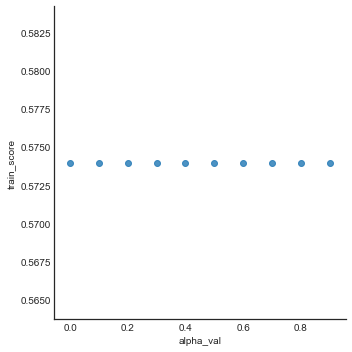

In [32]:
sns.lmplot('alpha_val', 'train_score', data=df_ridge_reg_score, fit_reg=False)

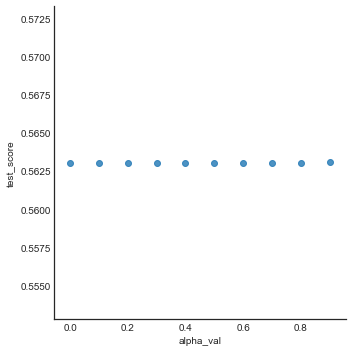

In [33]:
sns.lmplot('alpha_val', 'test_score', data=df_ridge_reg_score, fit_reg=False)

# Throw in some Lasso for kicks

In [34]:
# make an empty array called train
train = []
test = []

for num in alpha_i:
        # print(num)
        lassBig = linear_model.Lasso(alpha=num)
        lassBig.fit(X_train2, Y_train)
        # create a df
        train.append(lassBig.score(X_train2, Y_train))
        test.append(lassBig.score(X_test, Y_test))
        
df_lasso_score = pd.DataFrame()
df_lasso_score['alpha_val']   = alpha_i
df_lasso_score['train_score'] = train
df_lasso_score['test_score']  = test


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


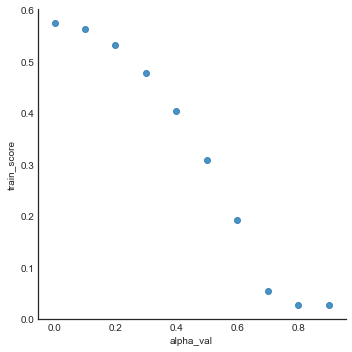

In [35]:
sns.lmplot('alpha_val', 'train_score', data=df_lasso_score, fit_reg=False)

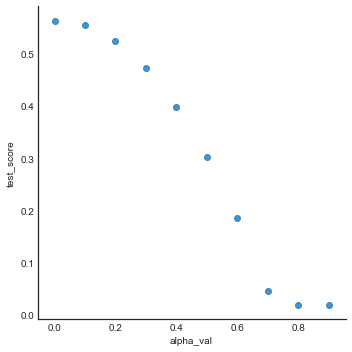

In [36]:
# And check the test scores- Lasso first
sns.lmplot('alpha_val', 'test_score', data=df_lasso_score, fit_reg=False)

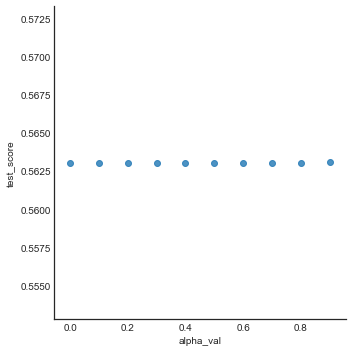

In [38]:
# ... and Ridge test scores
sns.lmplot('alpha_val', 'test_score', data=df_ridge_reg_score, fit_reg=False)